# Stock Price Prediction Using LR and SVR Models
Following the tutorial 
https://www.youtube.com/watch?v=EYnC4ACIt2g&list=PLqcF-HKeIFjPY_gJDbqoouJEbGNnYhboT

In [ ]:
pip install quandl

In [3]:
# Install the dependencies
import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [19]:
# Get the stock data
symbol = input("Enter the symbol for a stock to look up:")
df = quandl.get(f"WIKI/{symbol}")
# Take a look at the data
print(df.head())

Enter the symbol for a stock to look up: msft


             Open   High   Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                         
1986-03-13  25.50  29.25  25.5  28.00  3582600.0          0.0          1.0   
1986-03-14  28.00  29.50  28.0  29.00  1070000.0          0.0          1.0   
1986-03-17  29.00  29.75  29.0  29.50   462400.0          0.0          1.0   
1986-03-18  29.50  29.75  28.5  28.75   235300.0          0.0          1.0   
1986-03-19  28.75  29.00  28.0  28.25   166300.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close   Adj. Volume  
Date                                                                  
1986-03-13   0.058941   0.067609  0.058941    0.064720  1.031789e+09  
1986-03-14   0.064720   0.068187  0.064720    0.067031  3.081600e+08  
1986-03-17   0.067031   0.068765  0.067031    0.068187  1.331712e+08  
1986-03-18   0.068187   0.068765  0.065876    0.066454  6.776640e+07  
1986-03-19   0.066454   0.0

In [23]:
# Get the Adjusted Close Price
df = df[['Adj. Close']]
print(df.head())

            Adj. Close
Date                  
1986-03-13    0.064720
1986-03-14    0.067031
1986-03-17    0.068187
1986-03-18    0.066454
1986-03-19    0.065298


In [24]:
# A variable for predicting 'n' days out into the future
forecast_out = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
# print the new data set
print(df.head())
print(df.tail())

            Adj. Close  Prediction
Date                              
1986-03-13    0.064720    0.078011
1986-03-14    0.067031    0.078589
1986-03-17    0.068187    0.076277
1986-03-18    0.066454    0.074544
1986-03-19    0.065298    0.073388
            Adj. Close  Prediction
Date                              
2018-03-21       92.48         NaN
2018-03-22       89.79         NaN
2018-03-23       87.18         NaN
2018-03-26       93.78         NaN
2018-03-27       89.47         NaN


In [25]:
# Create the independent data set (X)
## Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'], axis=1))
## Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[6.47199796e-02]
 [6.70314075e-02]
 [6.81871214e-02]
 ...
 [8.48900000e+01]
 [8.81000000e+01]
 [8.91300000e+01]]


In [26]:
# Create the dependent data set (y)
# Convert df to a numpy array (All values including NaN)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[7.80106897e-02 7.85885467e-02 7.62771188e-02 ... 8.71800000e+01
 9.37800000e+01 8.94700000e+01]


In [27]:
# Split the data into 80% traing and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [29]:
# Testing Model: Score returns the coeffient of determination R^2 of the prediction
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9886222733472775


In [30]:
# Create and train the Linear Regression Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
# Testing Model: Score returns the coefficient of determination of R^2 of the prediction
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9868386036300343


In [32]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'], axis=1))[-forecast_out:]
print(x_forecast)

[[89.83]
 [90.81]
 [92.66]
 [92.  ]
 [92.72]
 [91.49]
 [91.74]
 [94.06]
 [95.42]
 [94.2 ]
 [93.77]
 [92.85]
 [93.05]
 [93.64]
 [93.32]
 [93.86]
 [94.43]
 [96.54]
 [96.77]
 [94.41]
 [93.85]
 [94.18]
 [94.6 ]
 [92.89]
 [93.13]
 [92.48]
 [89.79]
 [87.18]
 [93.78]
 [89.47]]


In [33]:
# Print the linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print the support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[91.87943063 92.88312829 94.77786367 94.10190402 94.83931455 93.57957157
 93.83561689 96.21171747 97.60460402 96.35510285 95.9147049  94.97245812
 95.17729437 95.78156133 95.45382332 96.00688122 96.59066455 98.75168707
 98.98724876 96.57018092 95.9966394  96.33461923 96.76477537 95.01342537
 95.25922888 94.59351104 91.83846338 89.16535022 95.92494671 91.51072537]
[93.02612167 93.05697653 94.62612836 93.8710337  94.6854873  93.37690913
 93.59506626 94.84321018 93.68902888 94.74500567 94.99936176 94.80227979
 94.94410189 95.04121368 95.04995373 94.95926429 94.56526146 90.96375268
 89.80020627 94.58147584 94.96413208 94.75969525 94.42517923 94.83455533
 94.98621392 94.4320553  93.03030159 93.77061901 94.99533185 93.08386068]


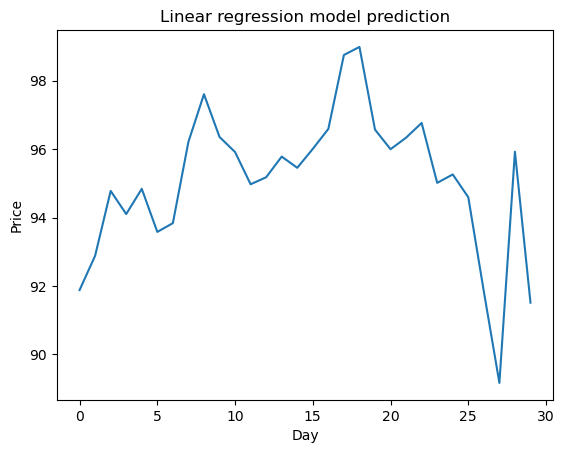

In [36]:
# Plot a graph for each model
x = np.arange(len(lr_prediction))
plt.plot(x, lr_prediction)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Linear regression model prediction')
plt.show()

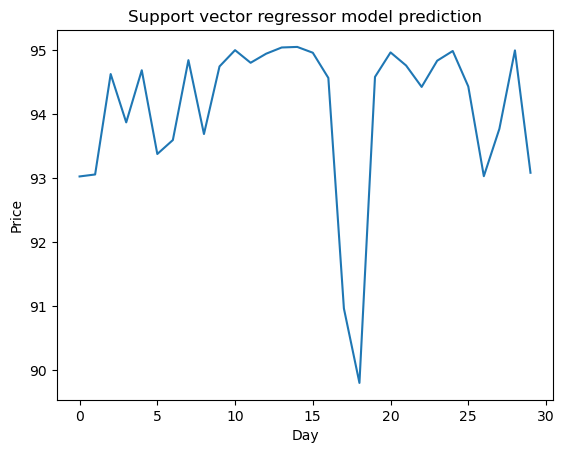

In [38]:
x = np.arange(len(svm_prediction))
plt.plot(x, svm_prediction)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Support vector regressor model prediction')
plt.show()